In [69]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
pd.set_option('max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

import keras

%matplotlib inline

In [457]:
train_org = pd.read_csv('./datasets/AIFrenz/train.csv')

train_org['date_time'] = pd.date_range(start='2020-03-01', end=None,
                                    periods=len(train_org), freq='10min')
train_org = train_org.set_index('date_time')
train_org = train_org.drop('id', axis=1)

print(train_org.shape)

(4752, 59)


In [458]:
train_org.head()

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,Y00,Y01,Y02,Y03,Y04,Y05,Y06,Y07,Y08,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18
date_time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-01 00:00:00,9.7,988.8,1.2,0.6,0.0,1009.3,989.6,12.2,1009.9,1009.8,0.0,0.0,82.4,71.3,0.0,101.1,0.0,56.1,0.3,0.0,91.0,0.0,1002.5,1009.8,1.1,2.3,0.5,1008.7,12.3,1001.6,69.1,8.2,10.7,1010.1,0.0,256.4,0.0,77.2,62.6,0.0,12.5,11.5,11.0,20.0,20.0,10.5,10.0,10.5,10.0,7.0,7.5,7.0,9.0,10.0,9.5,9.0,8.0,9.0,NaN
2020-03-01 00:10:00,9.3,988.9,1.7,1.9,0.0,1009.3,989.6,12.1,1010.0,1009.9,0.0,0.0,81.2,121.8,0.0,165.3,0.0,0.0,0.4,0.0,91.9,0.0,1002.5,1009.9,0.0,0.0,0.0,1008.7,12.1,1001.7,70.3,8.3,10.3,1010.1,0.0,215.4,0.0,77.3,63.5,0.0,12.5,11.0,11.0,20.0,20.0,10.0,9.5,10.0,9.5,6.5,7.5,7.0,8.5,10.0,9.5,9.0,7.5,9.0,NaN
2020-03-01 00:20:00,9.4,989.0,1.1,2.3,0.0,1009.2,989.7,12.1,1010.1,1010.1,0.0,0.0,86.1,232.0,0.0,144.0,0.0,0.0,0.6,0.0,93.3,0.0,1002.4,1009.8,0.0,0.0,0.0,1008.6,12.1,1001.6,71.5,8.0,9.7,1010.0,0.0,235.2,0.0,77.3,63.9,0.0,12.0,11.0,11.0,19.5,19.5,10.0,9.0,10.0,9.0,6.5,7.5,6.5,8.0,9.5,9.5,8.5,7.5,8.5,NaN
2020-03-01 00:30:00,9.4,988.9,1.5,0.7,0.0,1009.2,989.6,12.0,1010.0,1010.0,0.0,0.0,87.7,0.0,0.0,115.9,0.0,294.1,0.1,0.0,93.4,0.0,1002.4,1009.7,0.0,0.0,0.2,1008.7,12.1,1001.5,73.2,7.7,9.4,1010.1,0.0,214.0,0.0,77.5,64.5,0.0,12.0,11.0,11.0,19.5,19.5,9.5,9.0,9.5,9.0,6.0,7.0,6.0,8.0,9.5,9.0,8.5,7.5,8.5,NaN
2020-03-01 00:40:00,9.2,988.9,0.8,1.7,0.0,1009.2,989.7,12.0,1010.1,1010.0,0.0,0.0,88.9,0.0,0.0,124.7,0.0,0.0,0.0,0.0,94.1,0.0,1002.4,1009.7,0.0,0.0,0.0,1008.7,12.0,1001.5,74.3,7.4,9.4,1010.1,0.0,174.9,0.0,78.0,65.0,0.0,12.0,10.5,10.5,19.0,19.5,9.5,8.5,9.5,8.5,6.0,7.0,6.0,7.5,9.5,9.0,8.5,7.5,8.5,NaN


* X00, X07, X28, X31, X32 : 기온
* X01, X06, X22, X27, X29 : 현지기압
* X02, X03, X18, X24, X26 : 풍속
* X04, X10, X21, X36, X39 : 일일 누적강수량
* X05, X08, X09, X23, X33 : 해면기압
* X11, X14, X16, X19, X34 : 일일 누적일사량
* X12, X20, X30, X37, X38 : 습도
* X13, X15, X17, X25, X35 : 풍향
* Y00 ~ Y17 : 센서측정온도

In [501]:
X_temp    = ['X00', 'X07', 'X28', 'X31', 'X32']
X_airp    = ['X01', 'X06', 'X22', 'X27', 'X29']
X_windsp  = ['X02', 'X03', 'X18', 'X24', 'X26']
X_cumrain = ['X04', 'X10', 'X21', 'X36', 'X39']
X_seaairp = ['X05', 'X08', 'X09', 'X23', 'X33']
X_cumsun  = ['X11', 'X14', 'X16', 'X19', 'X34']
X_humid   = ['X12', 'X20', 'X30', 'X37', 'X38']
X_windd   = ['X13', 'X15', 'X17', 'X25', 'X35']

x_list    = ['X_temp','X_airp', 'X_windsp', 'X_cumrain', 'X_seaairp', 'X_cumsun', 'X_humid', 'X_windd']

In [ ]:
def mod_x_features(df, var_list):
    for i in x_list:
        df[]

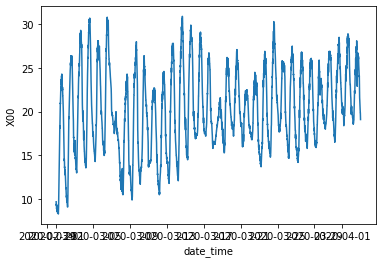

In [220]:
sns.lineplot(x=train_org.index, y='X00', data=train_org)

In [419]:
# 해당값이 비어있는 인덱스 찾기
train_org.loc[train_org.isnull()['Y00']].index.min()

Timestamp('2020-03-31 00:00:00')

### Lag and Rolling Functions

In [498]:
# lag 추가 함수
def add_lag(df, columns, term ):
    
    for i in columns:
        df[i +"_" + str(abs(term)) + '_lag'] = df[i].shift(term)
    return df


# rolling 추가 함수
def add_rolling(df, columns, term, min_periods=1 ):

    for i in columns:
        rolling_mean = df[i].rolling(window=term, min_periods=min_periods).mean()
        df.insert(len(df.columns), i+'_rolling_mean_'+str(term), rolling_mean)
        rolling_std = df[i].rolling(window=term, min_periods=min_periods).std()
        df.insert(len(df.columns), i+'_rolling_std_'+str(term), rolling_std)
        
        del rolling_mean, rolling_std
        
    return df

### add Features

In [420]:
train_org.columns

Index(['X00', 'X01', 'X02', 'X03', 'X04', 'X05', 'X06', 'X07', 'X08', 'X09',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29',
       'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39',
       'Y00', 'Y01', 'Y02', 'Y03', 'Y04', 'Y05', 'Y06', 'Y07', 'Y08', 'Y09',
       'Y10', 'Y11', 'Y12', 'Y13', 'Y14', 'Y15', 'Y16', 'Y17', 'Y18'],
      dtype='object')

In [421]:
lnr_columns = ['X00', 'X01', 'X02', 'X03', 'X04', 'X05', 'X06', 'X07', 'X08', 'X09',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29',
       'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39']

In [422]:
y_cols = ['Y00','Y01', 'Y02', 'Y03', 'Y04', 'Y05', 'Y06', 'Y07', 'Y08', 'Y09','Y10', 'Y11', 
     'Y12', 'Y13', 'Y14', 'Y15', 'Y16', 'Y17', 'Y18']

In [460]:
add_lag(train_org, lnr_columns, -3)
add_lag(train_org, lnr_columns, -6)

add_rolling(train_org, lnr_columns, 6)
add_rolling(train_org, lnr_columns, 18)

(                      X00    X01  X02  X03  X04     X05    X06   X07     X08  \
 date_time                                                                      
 2020-03-01 00:00:00   9.7  988.8  1.2  0.6  0.0  1009.3  989.6  12.2  1009.9   
 2020-03-01 00:10:00   9.3  988.9  1.7  1.9  0.0  1009.3  989.6  12.1  1010.0   
 2020-03-01 00:20:00   9.4  989.0  1.1  2.3  0.0  1009.2  989.7  12.1  1010.1   
 2020-03-01 00:30:00   9.4  988.9  1.5  0.7  0.0  1009.2  989.6  12.0  1010.0   
 2020-03-01 00:40:00   9.2  988.9  0.8  1.7  0.0  1009.2  989.7  12.0  1010.1   
 ...                   ...    ...  ...  ...  ...     ...    ...   ...     ...   
 2020-04-02 23:10:00  19.9  987.6  0.9  0.8  0.0  1006.9  987.7  21.7  1007.5   
 2020-04-02 23:20:00  19.9  987.6  0.5  0.7  0.0  1006.8  987.7  21.6  1007.5   
 2020-04-02 23:30:00  19.7  987.7  0.9  0.6  0.0  1006.9  987.6  21.4  1007.4   
 2020-04-02 23:40:00  19.4  987.7  0.9  0.8  0.0  1006.9  987.8  21.3  1007.6   
 2020-04-02 23:50:00  19.1  

In [ ]:
train = train.fillna(method='bfill')

In [461]:
train_org.head()

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,Y00,Y01,Y02,Y03,Y04,Y05,Y06,Y07,Y08,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18,X00_3_lag,X01_3_lag,X02_3_lag,X03_3_lag,X04_3_lag,X05_3_lag,X06_3_lag,X07_3_lag,X08_3_lag,X09_3_lag,X10_3_lag,X11_3_lag,X12_3_lag,X13_3_lag,X14_3_lag,X15_3_lag,X16_3_lag,X17_3_lag,X18_3_lag,X19_3_lag,X20_3_lag,X21_3_lag,X22_3_lag,X23_3_lag,X24_3_lag,X25_3_lag,X26_3_lag,X27_3_lag,X28_3_lag,X29_3_lag,X30_3_lag,X31_3_lag,X32_3_lag,X33_3_lag,X34_3_lag,X35_3_lag,X36_3_lag,X37_3_lag,X38_3_lag,X39_3_lag,X00_6_lag,X01_6_lag,X02_6_lag,X03_6_lag,X04_6_lag,X05_6_lag,X06_6_lag,X07_6_lag,X08_6_lag,X09_6_lag,X10_6_lag,X11_6_lag,X12_6_lag,X13_6_lag,X14_6_lag,X15_6_lag,X16_6_lag,X17_6_lag,X18_6_lag,X19_6_lag,X20_6_lag,X21_6_lag,X22_6_lag,X23_6_lag,X24_6_lag,X25_6_lag,X26_6_lag,X27_6_lag,X28_6_lag,X29_6_lag,X30_6_lag,X31_6_lag,X32_6_lag,X33_6_lag,X34_6_lag,X35_6_lag,X36_6_lag,X37_6_lag,X38_6_lag,X39_6_lag,X00_rolling_mean_6,X00_rolling_std_6,X01_rolling_mean_6,X01_rolling_std_6,X02_rolling_mean_6,X02_rolling_std_6,X03_rolling_mean_6,X03_rolling_std_6,X04_rolling_mean_6,X04_rolling_std_6,X05_rolling_mean_6,X05_rolling_std_6,X06_rolling_mean_6,X06_rolling_std_6,X07_rolling_mean_6,X07_rolling_std_6,X08_rolling_mean_6,X08_rolling_std_6,X09_rolling_mean_6,X09_rolling_std_6,X10_rolling_mean_6,X10_rolling_std_6,X11_rolling_mean_6,X11_rolling_std_6,X12_rolling_mean_6,X12_rolling_std_6,X13_rolling_mean_6,X13_rolling_std_6,X14_rolling_mean_6,X14_rolling_std_6,X15_rolling_mean_6,X15_rolling_std_6,X16_rolling_mean_6,X16_rolling_std_6,X17_rolling_mean_6,X17_rolling_std_6,X18_rolling_mean_6,X18_rolling_std_6,X19_rolling_mean_6,X19_rolling_std_6,X20_rolling_mean_6,X20_rolling_std_6,X21_rolling_mean_6,X21_rolling_std_6,X22_rolling_mean_6,X22_rolling_std_6,X23_rolling_mean_6,X23_rolling_std_6,X24_rolling_mean_6,X24_rolling_std_6,X25_rolling_mean_6,X25_rolling_std_6,X26_rolling_mean_6,X26_rolling_std_6,X27_rolling_mean_6,X27_rolling_std_6,X28_rolling_mean_6,X28_rolling_std_6,X29_rolling_mean_6,X29_rolling_std_6,X30_rolling_mean_6,X30_rolling_std_6,X31_rolling_mean_6,X31_rolling_std_6,X32_rolling_mean_6,X32_rolling_std_6,X33_rolling_mean_6,X33_rolling_std_6,X34_rolling_mean_6,X34_rolling_std_6,X35_rolling_mean_6,X35_rolling_std_6,X36_rolling_mean_6,X36_rolling_std_6,X37_rolling_mean_6,X37_rolling_std_6,X38_rolling_mean_6,X38_rolling_std_6,X39_rolling_mean_6,X39_rolling_std_6,X00_rolling_mean_18,X00_rolling_std_18,X01_rolling_mean_18,X01_rolling_std_18,X02_rolling_mean_18,X02_rolling_std_18,X03_rolling_mean_18,X03_rolling_std_18,X04_rolling_mean_18,X04_rolling_std_18,X05_rolling_mean_18,X05_rolling_std_18,X06_rolling_mean_18,X06_rolling_std_18,X07_rolling_mean_18,X07_rolling_std_18,X08_rolling_mean_18,X08_rolling_std_18,X09_rolling_mean_18,X09_rolling_std_18,X10_rolling_mean_18,X10_rolling_std_18,X11_rolling_mean_18,X11_rolling_std_18,X12_rolling_mean_18,X12_rolling_std_18,X13_rolling_mean_18,X13_rolling_std_18,X14_rolling_mean_18,X14_rolling_std_18,X15_rolling_mean_18,X15_rolling_std_18,X16_rolling_mean_18,X16_rolling_std_18,X17_rolling_mean_18,X17_rolling_std_18,X18_rolling_mean_18,X18_rolling_std_18,X19_rolling_mean_18,X19_rolling_std_18,X20_rolling_mean_18,X20_rolling_std_18,X21_rolling_mean_18,X21_rolling_std_18,X22_rolling_mean_18,X22_rolling_std_18,X23_rolling_mean_18,X23_rolling_std_18,X24_rolling_mean_18,X24_rolling_std_18,X25_rolling_mean_18,X25_rolling_std_18,X26_rolling_mean_18,X26_rolling_std_18,X27_rolling_mean_18,X27_rolling_std_18,X28_rolling_mean_18,X28_rolling_std_18,X29_rolling_mean_18,X29_rolling_std_18,X30_rolling_mean_18,X30_rolling_std_18,X31_rolling_mean_18,X31_rolling_std_18,X32_rolling_mean_18,X32_rolling_std_18,X33_rolling_mean_18,X33_rolling_std_18,X34_rolling_mean_18,X34_rolling_std_18,X35_rolling_mean_18,X35_rolling_std_18,X36_rolling_mean_18,X36_rolling_std_18,X37_rolling_mean_18,X37_rolling_std_18,X

In [462]:
train_org = train_org.drop(['Y01', 'Y02', 'Y03', 'Y04', 'Y05', 'Y06', 'Y07', 'Y08', 'Y09','Y10', 'Y11', 
     'Y12', 'Y13', 'Y14', 'Y15', 'Y16', 'Y17', 'Y18'], axis=1)

### Datetime Features

In [463]:
train_org['hour']         = train_org.index.hour
train_org['day_of_month'] = train_org.index.day
#train_org['day_of_week']  = train_org.index.dayofweek

In [464]:
ohe_columns = ['hour','day_of_month']

train_org = pd.get_dummies(train_org, columns=ohe_columns)

In [466]:
train= train_org.loc[train_org.index < '2020-03-31 00:00:00']
test = train_org.loc[train_org.index >= '2020-03-31 00:00:00']
print(train.shape)
print(test.shape)

(4320, 336)
(432, 336)


In [467]:
train= train.fillna(method='bfill')

In [430]:
train[train.columns.difference(['Y00'])].columns

Index(['X00', 'X00_3_lag', 'X00_6_lag', 'X00_rolling_mean_18',
       'X00_rolling_mean_6', 'X00_rolling_std_18', 'X00_rolling_std_6', 'X01',
       'X01_3_lag', 'X01_6_lag',
       ...
       'hour_21', 'hour_22', 'hour_23', 'hour_3', 'hour_4', 'hour_5', 'hour_6',
       'hour_7', 'hour_8', 'hour_9'],
      dtype='object', length=342)

### Preprocessing

In [468]:
# f_columns = ['X00', 'X01', 'X02', 'X03', 'X04', 'X05', 'X06', 'X07', 'X08', 'X09',
#        'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
#        'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29',
#        'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39']

# f_columns = tuple(f_columns)

f_transformer    = RobustScaler()
y_transformer    = RobustScaler()

f_transformer    = f_transformer.fit(train[train.columns.difference(['Y00'])].to_numpy())
y_transformer    = y00_transformer.fit(train[['Y00']])

train.loc[:, train.columns.difference(['Y00'])] = f_transformer.transform(train[train.columns.difference(['Y00'])].to_numpy())
train['Y00']     = y_transformer.transform(train[['Y00']])

test.loc[:, test.columns.difference(['Y00'])] = f_transformer.transform(test[test.columns.difference(['Y00'])].to_numpy())
test['Y00'] = y_transformer.transform(test[['Y00']])

In [469]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        if y is not None :
            ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [470]:
time_steps = 1

X_train, y_train = create_dataset(train, train.Y00, time_steps)
X_test, y_test = create_dataset(test, test.Y00, time_steps)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4319, 1, 336) (4319,)
(431, 1, 336) (431,)


In [478]:
model = keras.Sequential()
model.add(
  keras.layers.Bidirectional(
    keras.layers.LSTM(
      units=128,
      dropout = 0.2,  
      input_shape=(X_train.shape[1], X_train.shape[2])
    )
  )
)
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [188]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_4 (Bidirection (None, 256)               236544    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 236,801
Trainable params: 236,801
Non-trainable params: 0
_________________________________________________________________


In [479]:
history = model.fit(
    X_train, y_train, 
    epochs=30, 
    batch_size=32, 
    validation_split=0.1,
    shuffle=False
)

Train on 3887 samples, validate on 432 samples
Epoch 1/30
3887/3887 [==============================] - 2s 567us/step - loss: 0.2433 - val_loss: 0.1783
Epoch 2/30
3887/3887 [==============================] - 1s 203us/step - loss: 0.1825 - val_loss: 0.0637
Epoch 3/30
3887/3887 [==============================] - 1s 205us/step - loss: 0.0986 - val_loss: 0.0732
Epoch 4/30
3887/3887 [==============================] - 1s 207us/step - loss: 0.0794 - val_loss: 0.0358
Epoch 5/30
3887/3887 [==============================] - 1s 208us/step - loss: 0.0586 - val_loss: 0.0266
Epoch 6/30
3887/3887 [==============================] - 1s 206us/step - loss: 0.0508 - val_loss: 0.0177
Epoch 7/30
3887/3887 [==============================] - 1s 209us/step - loss: 0.0445 - val_loss: 0.0164
Epoch 8/30
3887/3887 [==============================] - 1s 210us/step - loss: 0.0457 - val_loss: 0.0109
Epoch 9/30
3887/3887 [==============================] - 1s 221us/step - loss: 0.0442 - val_loss: 0.0135
Epoch 10/30
3887/

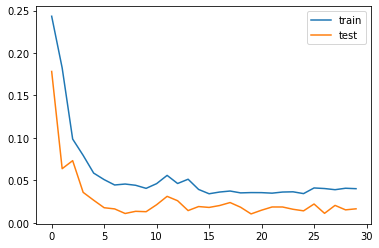

In [480]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

In [453]:
print(np.mean(history.history['loss']))
print(np.mean(history.history['val_loss']))

0.12248634987108774
0.11391777142790366


In [481]:
print(np.mean(history.history['loss']))
print(np.mean(history.history['val_loss']))

0.0561446997286368
0.027322193351933553


In [475]:
X_test.shape

(431, 1, 336)

In [482]:
y_pred = model.predict(X_test)

In [485]:
y_train_inv = y00_transformer.inverse_transform(y_train.reshape(1, -1))
#y_test_inv = y00_transformer.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = y00_transformer.inverse_transform(y_pred)

In [483]:
len(y_pred_inv)

431

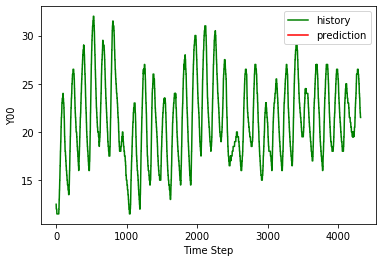

In [447]:
plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label="history")
#plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_pred)), y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Y00')
plt.xlabel('Time Step')
plt.legend()
plt.show()

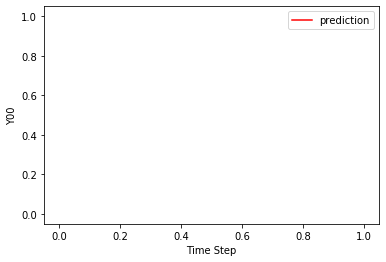

In [448]:
#plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Y00')
plt.xlabel('Time Step')
plt.legend()
plt.show()